## Installing sko Module

In [2]:
pip install sko

# PART 1: Install and Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sko.PSO import PSO
from tqdm import tqdm  

# PART 2: Generate Random Cities and Compute Distance Matrix

In [ ]:
np.random.seed(42)

num_cities = 40

city_coords = np.random.rand(num_cities, 2)

distance_matrix = cdist(city_coords, city_coords, metric='euclidean')

# PART 3: Define the Objective Function

In [ ]:
def total_distance(tour):
    tour = np.argsort(tour)
    return sum([
        distance_matrix[tour[i % num_cities], tour[(i + 1) % num_cities]]
        for i in range(num_cities)
    ])

# PART 4: PSO Runner with Configurable Parameters

In [ ]:
def run_pso_experiment(w, c1, c2, max_iter=300):

    pso = PSO(
        func=total_distance,
        dim=num_cities,
        pop=100,
        max_iter=max_iter,
        lb=[0]*num_cities,
        ub=[num_cities]*num_cities,
        w=w,
        c1=c1,
        c2=c2
    )

    pso.run()
    return pso.gbest_y, pso.gbest_y_hist, pso.gbest_x

# PART 5: Run Experiments with Varying Parameters

In [ ]:

iterations = 300

w_values = [0.4, 0.6, 0.8, 1.0]
c1_values = [0.1, 0.5, 1.0, 1.5]
c2_values = [0.1, 0.5, 1.0, 1.5]

w_results, c1_results, c2_results = {}, {}, {}

for w in tqdm(w_values, desc="Testing w values"):
    dist, hist, _ = run_pso_experiment(w=w, c1=0.5, c2=0.5, max_iter=iterations)
    w_results[w] = hist

for c1 in tqdm(c1_values, desc="Testing c1 values"):
    dist, hist, _ = run_pso_experiment(w=0.8, c1=c1, c2=0.5, max_iter=iterations)
    c1_results[c1] = hist

for c2 in tqdm(c2_values, desc="Testing c2 values"):
    dist, hist, _ = run_pso_experiment(w=0.8, c1=0.5, c2=c2, max_iter=iterations)
    c2_results[c2] = hist


Testing c2 values: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


# PART 6: Plotting Results for All Parameters

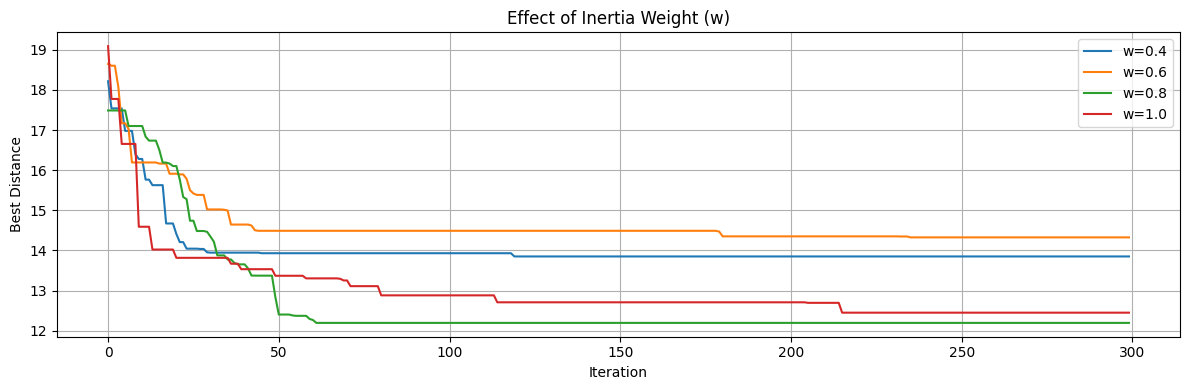

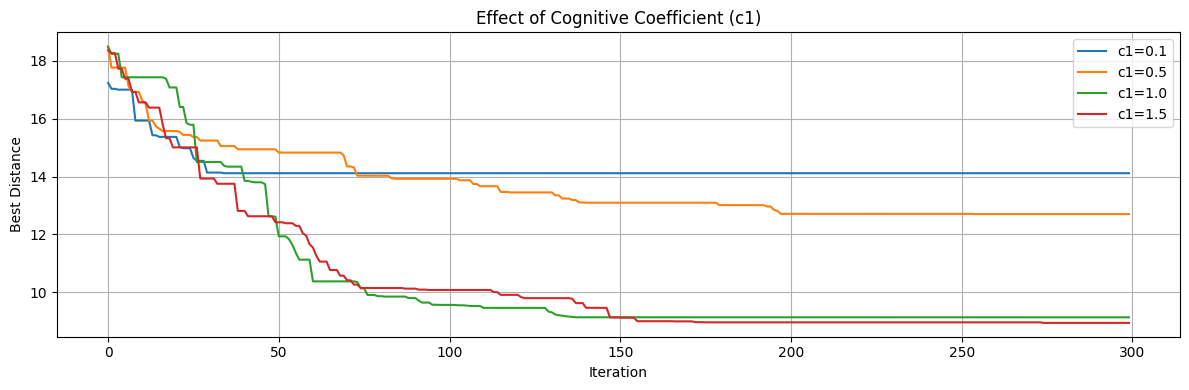

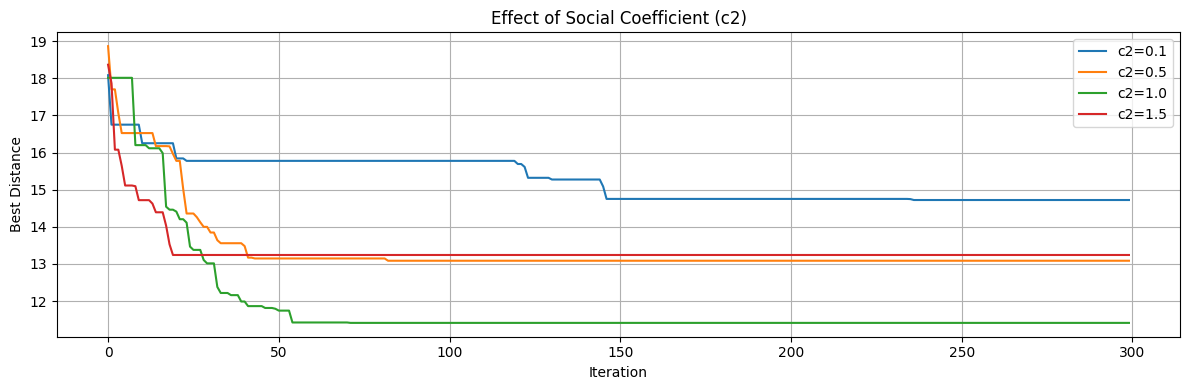

In [ ]:
plt.figure(figsize=(12, 4))
for w in w_values:
    plt.plot(w_results[w], label=f"w={w}")
plt.title("Effect of Inertia Weight (w)")
plt.xlabel("Iteration")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
for c1 in c1_values:
    plt.plot(c1_results[c1], label=f"c1={c1}")
plt.title("Effect of Cognitive Coefficient (c1)")
plt.xlabel("Iteration")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
for c2 in c2_values:
    plt.plot(c2_results[c2], label=f"c2={c2}")
plt.title("Effect of Social Coefficient (c2)")
plt.xlabel("Iteration")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Convergence Curve with Highlighted Minimums

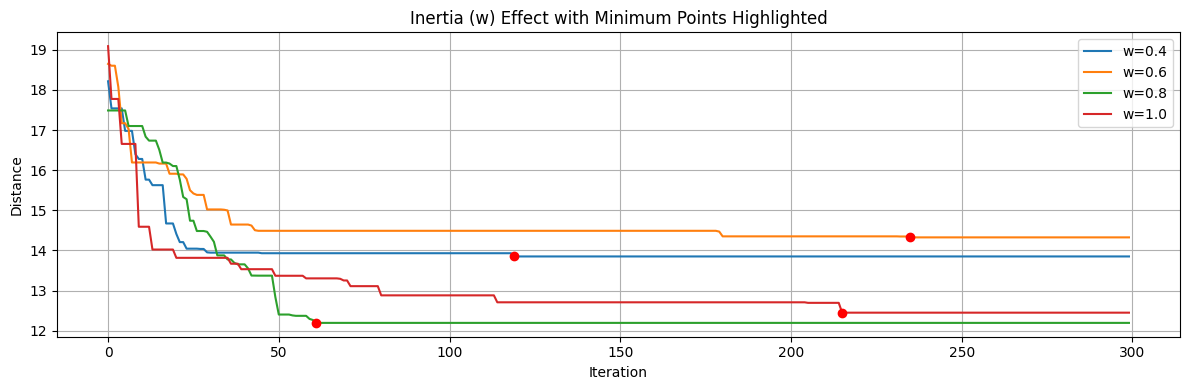

In [ ]:

plt.figure(figsize=(12, 4))
for w in w_values:
    y = w_results[w]
    plt.plot(y, label=f"w={w}")
    min_idx = np.argmin(y)
    plt.plot(min_idx, y[min_idx], 'ro')  
plt.title("Inertia (w) Effect with Minimum Points Highlighted")
plt.xlabel("Iteration")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()